In [1]:
import sys
import sklearn
import matplotlib
import numpy as np

print('python:',format(sys.version))
print('sklearn:',format(sklearn.__version__))

python: 3.7.1 (default, Dec 10 2018, 22:54:23) [MSC v.1915 64 bit (AMD64)]
sklearn: 0.20.1


In [2]:
from keras.datasets import mnist
(x_train , y_train),(x_test,y_test) = mnist.load_data()

Using TensorFlow backend.
C:\Users\sam\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\sam\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\sam\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\sam\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:529: Fu

In [3]:
print('Training Data: {}',format(x_train.shape))
print('Training labels: {}',format(y_train.shape))

Training Data: {} (60000, 28, 28)
Training labels: {} (60000,)


In [4]:
print('Testing Data: ', format(x_test.shape))
print('Testing Labels: ', format(y_test.shape))

Testing Data:  (10000, 28, 28)
Testing Labels:  (10000,)


In [5]:

import matplotlib
matplotlib.use('svg')

import matplotlib.pyplot as plt
#Python magic function
%matplotlib inline

C:\Users\sam\Anaconda3\lib\site-packages\matplotlib\figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


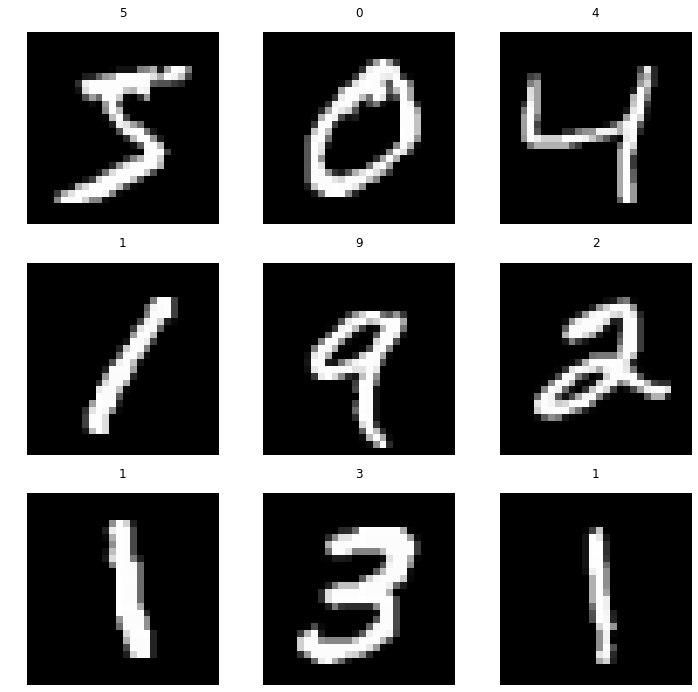

In [6]:
#create fig with3X3 subplots using matplotlib.pyplot
fig,axs = plt.subplots(3,3,figsize = (12,12))
plt.gray()

#loop through subplots and add mnist images
for i,ax in enumerate(axs.flat):
    ax.matshow(x_train[i])
    ax.axis('off')
    ax.set_title(y_train[i])
               
#Display the image
    fig.show()

In [7]:
#Preprocessing the image
# Convert Each img To 1D Array
X= x_train.reshape(len(x_train),-1)
Y=y_train

#Normalize the Data 0 - 1
X = X.astype(float) / 255.

print(X.shape)
print(X[0].shape)

(60000, 784)
(784,)


In [8]:
from sklearn.cluster import MiniBatchKMeans

n_digits=len(np.unique(y_test))
print(n_digits)

#initialize KMeans model
kmeans = MiniBatchKMeans(n_clusters = n_digits)

#Fit the Model
kmeans.fit(X)

10


MiniBatchKMeans(batch_size=100, compute_labels=True, init='k-means++',
        init_size=None, max_iter=100, max_no_improvement=10, n_clusters=10,
        n_init=3, random_state=None, reassignment_ratio=0.01, tol=0.0,
        verbose=0)

In [9]:
kmeans.labels_[:20]

array([0, 8, 2, 1, 5, 7, 1, 0, 1, 3, 4, 1, 4, 9, 1, 3, 7, 0, 9, 3])

In [10]:
def infer_cluster_labels(kmeans,actual_labels):
    """
    Associates most probable label with each cluster in kmeans model
    returns:dictonary of clusters assigned to each label
    """
    
    inferred_labels = {}
    
    for i in range(kmeans.n_clusters):
        
        
        #find index of points in clusters
        labels = []
        index = np.where(kmeans.labels_ == i)
    
        #append atual labels for each point in cluster
        labels.append(actual_labels[index])
    
        #determine most common labels
        if len(labels[0]) == 1:
            counts = np.bincount(labels[0])
        else:
            counts = np.bincount(np.squeeze(labels))
            
            #assign the cluster to a value in the inferred_labels dictonary
        if np.argmax(counts) in inferred_labels:
            #append the new no. in the existing array at this key
            inferred_labels[np.argmax(counts)].append(i)
        else:
            # create a new array for this key
            inferred_labels[np.argmax(counts)] = [i]
            
        ##print(labels)
       ## print('cluster: {},label: {}',format(i,np.argmax(counts)))
            
            
    return inferred_labels

def infer_data_labels(X_labels,cluster_labels):
    """
    Determines labels For each  array,depending on the cluster it has been assigned to 
    returns: predicted labels for each array
    """
    #empty array of len(X)
    predicted_labels = np.zeros(len(X_labels)).astype(np.uint8)
    
    for i ,cluster in enumerate(X_labels):
        for key,value in cluster_labels.items():
            if cluster in value:
                predicted_labels[i] = key
                
    return predicted_labels

        

In [11]:
#test the infer_cluster_label() and infer_data_label()  Functions
cluster_labels = infer_cluster_labels(kmeans,Y)
X_clusters = kmeans.predict(X)
predicted_labels = infer_data_labels(X_clusters,cluster_labels)
print (predicted_labels[:20])
print (Y[:20])

[5 0 4 1 9 2 1 5 1 7 3 1 3 6 1 7 2 5 6 7]
[5 0 4 1 9 2 1 3 1 4 3 5 3 6 1 7 2 8 6 9]


In [12]:
## optimizing and Evaluating the Clustering algorithm
from sklearn import metrics

def calculate_metrics(estimator,data,labels):
    
    #calculating and print matrics
    print('Number of Clusters: {}'.format(estimator.n_clusters))
    print('Inertia: {}'.format(estimator.inertia_))
    print('Homogeneity: {}'.format(metrics.homogeneity_score(labels,estimator.labels_)))

In [13]:
clusters = [10,16,36,64,256,400]

#test diff no. of clusters
for n_clusters in clusters:
    
    estimator = MiniBatchKMeans(n_clusters = n_clusters)
    estimator.fit(X)
    
    #print cluster metrics
    calculate_metrics(estimator,X,Y)
    
    #Determine Predicted Labels
    cluster_labels = infer_cluster_labels(estimator,Y)
    predicted_Y = infer_data_labels(estimator.labels_, cluster_labels)
    
    #Calculate the print accuracy
    print('Accuracy: {} \n'.format(metrics.accuracy_score(Y,predicted_Y)))

Number of Clusters: 10
Inertia: 2398444.758813886
Homogeneity: 0.4636762779282943
Accuracy: 0.5617 

Number of Clusters: 16
Inertia: 2273131.532454797
Homogeneity: 0.5019328609817444
Accuracy: 0.5824166666666667 

Number of Clusters: 36
Inertia: 1954900.303277633
Homogeneity: 0.6782712175519247
Accuracy: 0.75055 

Number of Clusters: 64
Inertia: 1818613.717867468
Homogeneity: 0.7368293298614458
Accuracy: 0.8105833333333333 

Number of Clusters: 256
Inertia: 1518564.0735550055
Homogeneity: 0.8398474301449748
Accuracy: 0.8962 



C:\Users\sam\Anaconda3\lib\site-packages\sklearn\cluster\k_means_.py:1559: RuntimeWarning: init_size=300 should be larger than k=400. Setting it to 3*k
  init_size=init_size)
C:\Users\sam\Anaconda3\lib\site-packages\sklearn\cluster\k_means_.py:1559: RuntimeWarning: init_size=300 should be larger than k=400. Setting it to 3*k
  init_size=init_size)
C:\Users\sam\Anaconda3\lib\site-packages\sklearn\cluster\k_means_.py:1559: RuntimeWarning: init_size=300 should be larger than k=400. Setting it to 3*k
  init_size=init_size)


Number of Clusters: 400
Inertia: 1434007.719626252
Homogeneity: 0.865171985831317
Accuracy: 0.9093333333333333 



In [16]:
#test KMeans on testing Dataset
#Convert Each Image Into 1D Array
X_test=x_test.reshape(len(x_test),-1)

#Normalize the data to 0 - 1 
X_test = X_test.astype(float)/255.

#initialize and fit KMeans on training data
kmeans = MiniBatchKMeans(n_clusters = 400)
kmeans.fit(X)
cluster_labels = infer_cluster_labels(kmeans,Y)

#predict the labels for testing data
test_clusters = kmeans.predict(X_test)
predicted_labels = infer_data_labels(test_clusters, cluster_labels)

#Calculate And print accuracy
print('Testing_Accuracy: {}'.format(metrics.accuracy_score(y_test,predicted_labels)))

C:\Users\sam\Anaconda3\lib\site-packages\sklearn\cluster\k_means_.py:1559: RuntimeWarning: init_size=300 should be larger than k=400. Setting it to 3*k
  init_size=init_size)
C:\Users\sam\Anaconda3\lib\site-packages\sklearn\cluster\k_means_.py:1559: RuntimeWarning: init_size=300 should be larger than k=400. Setting it to 3*k
  init_size=init_size)
C:\Users\sam\Anaconda3\lib\site-packages\sklearn\cluster\k_means_.py:1559: RuntimeWarning: init_size=300 should be larger than k=400. Setting it to 3*k
  init_size=init_size)


Testing_Accuracy: 0.9112


C:\Users\sam\Anaconda3\lib\site-packages\matplotlib\figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


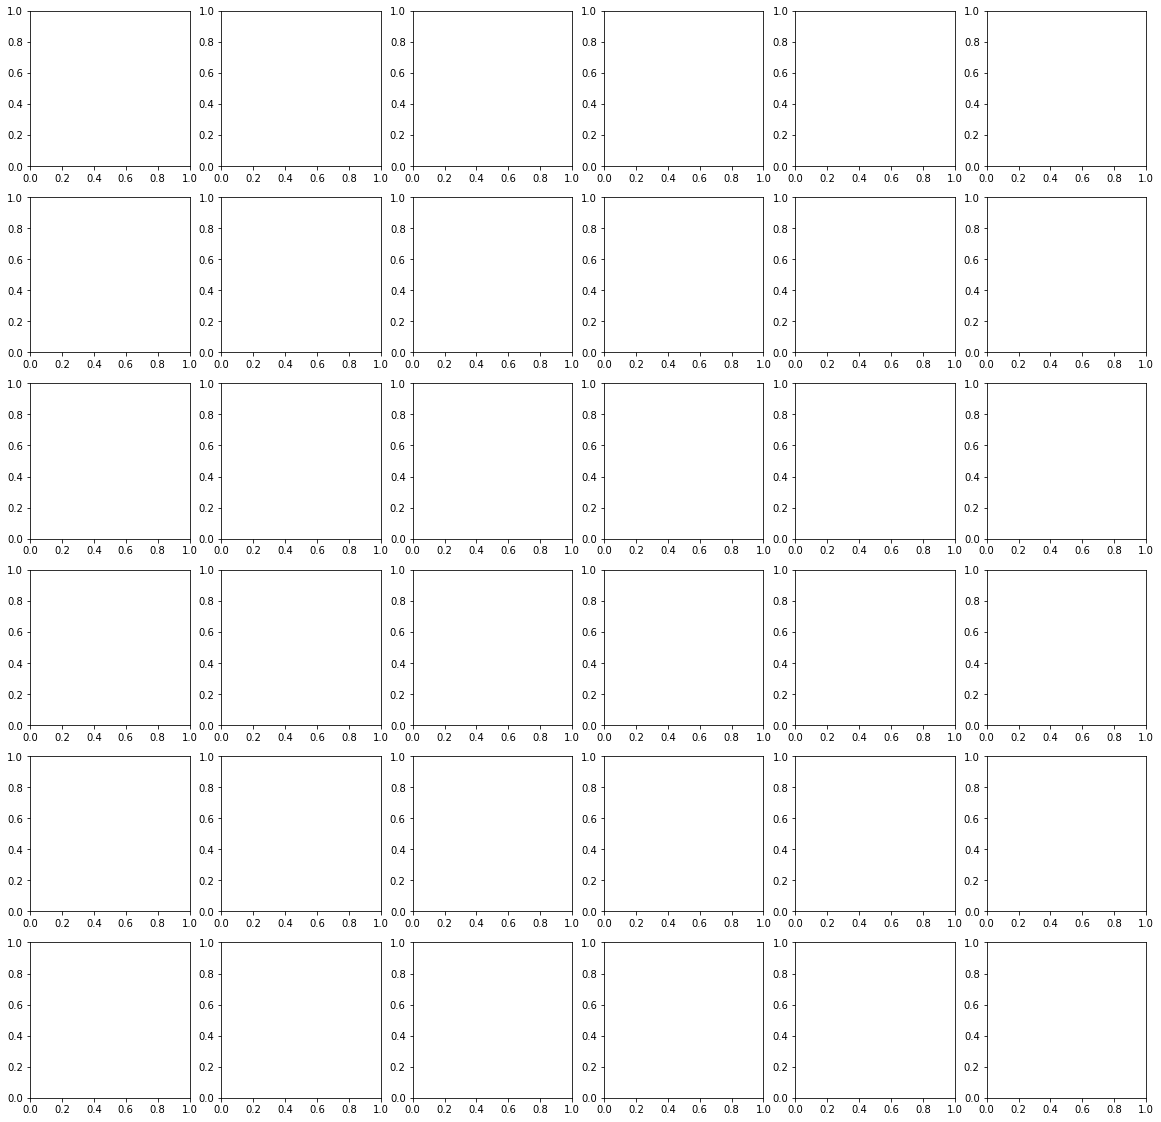

In [17]:
#Visualize cluster centroid
#initialize and fit  kmeans algoritm

kmeans = MiniBatchKMeans(n_clusters = 36)
kmeans.fit(X)

#record centroid values
centroids = kmeans.cluster_centers_

#Reshape centroids into images

images = centroids.reshape(36,28,28)
images *=255
images = images.astype(np.uint8)

#Determine Cluster Labels
cluster_labels = infer_cluster_labels(kmeans,Y)

#create fig with subplots using matplotlib.pyplot
fig.axs = plt.subplots(6,6,figsize=(20,20))
plt.gray()


#Loop through subplots and add centroid images
for i ,ax in enumerate(axs.flat):
    #determine inferred labels using cluster_labels dictionary
    for key ,value in cluster_labels.items():
        if i in value:
            ax.set_title('inferred_label: {}'.format(key))
            
    #add img to subplot
    ax.matshow(images[i])
    ax.axis('off')
    
    #display the shape
    fig.show()